In [5]:
import geopandas as gpd
import os
import pandas as pd
import glob
import datetime

In [6]:
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
fold = r"C:\Users\arich\Desktop\Shape Files GIS-20240311T200548Z-001\Shape Files GIS"
main =  os.walk(fold)

sites = {}
for path, dirnames, filenames in main:
    
    for file in filenames:
        if  file.endswith('.shp') and ("sites" in file.lower()):
            print(file)
            # print('{} {} {}'.format(repr(path), repr(dirnames), repr(file)))
            cur = gpd.read_file(os.path.join(path, file))
            sites[file] = cur
            # df.extend([cur])

201607_SR_Sites_with_Analysis.shp
201609_SR_Sites_with_Analysis.shp
201611_SR_Sites_with_Analysis.shp
201701_SR_Sites_with_analysis.shp
201703_SR_Sites_with_analysis_2.shp
201705_SR_Sites_with_analysis.shp
201707_SR_Sites_with_Analysis.shp
201709_SR_Sites_with_analysis.shp
201711_SR_Sites_with_analysis.shp
201711_SR_Sites_with_analysis.shp
201801_SR_Sites_with_analysis.shp
201803_SR_Sites_with_analysis.shp
201805_SR_Sites_with_analysis.shp
201807_SR_Sites_with_Analysis.shp
201810_SR_Sites_with_Analysis.shp
201901_SR_Sites_with_Analysis.shp
Seepage_Run_Sites_July2021.shp
Seepage_Run_Sites_March2021.shp
Seepage_Run_Sites_May2021.shp
Seepage_Run_Sites_November2021.shp
Seepage_Run_Sites_September2021.shp
Seepage_Run_Sites_January2022.shp
Seepage_Run_Sites_July2022.shp
Seepage_Run_Sites_May2022.shp
Seepage_Run_Sites_November2022.shp
Seepage_Run_Sites_September2022.shp
Seepage_Run_Sites_November2023.shp
Seepage_Run_Sites_January2024.shp


In [7]:
import conda_scripts
import numpy as np

C:\rich_py\conda_scripts\conda_scripts\sv_budget\sv_budget.py:2: DeprecationWarning: invalid escape sequence \c
  sys.path.append('c:\conda_scripts')


In [5]:
os.listdir()

['.ipynb_checkpoints',
 'base_model_data',
 'extract stream discharge from seepage runs.ipynb',
 'forward_run.py',
 'helpers.py',
 'Land Use check.ipynb',
 'load water level data.ipynb',
 'make_sfr_template.ipynb',
 'model updates.pptx',
 'modflow_to_pest_like_a_boss',
 'OWHM2_comp.py',
 'PEST.ipynb',
 'pilot points.ipynb',
 'PstFrom.log',
 'seepat_site_locs.png',
 'subcat_extend.png',
 'subcat_w_connects.png',
 'SV bud proces_model_comp.ipynb',
 'SV_OWHM 1to2 2024.ipynb',
 'temp',
 'versions',
 '__pycache__']

In [6]:
# Path to the output Excel file
output_file = '..\discharge\meas.xlsx'

# Create an Excel writer object
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    for sheet_name, gdf in sites.items():
        # Convert GeoDataFrame to DataFrame
        df = pd.DataFrame(gdf.drop(columns='geometry'))
        # Write DataFrame to Excel sheet
        df.to_excel(writer, sheet_name=sheet_name, index=False)

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
C:\Users\arich\AppData\Local\Temp\1\ipykernel_17208\1262384334.py:2: DeprecationWarning: invalid escape sequence \d
  output_file = '..\discharge\meas.xlsx'
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
C:\Users\arich\AppData\Local\mambaforge\envs\gis_py_10\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is

In [7]:
alls = []
for k in sites.keys():
    cols = 'WPName 	 	Date 	 	LAT 	LON  Discharge	SiteName CreekCode geometry  source'.split()
    dfo = sites[k]
    # dfo.loc[:,'source'] = k
    if 'Discharge' in dfo.columns:
        dfo = dfo.astype({'Discharge':float})
        # print(dfo.head(),'\n\n', '-'*20,'\n')
        cols = [x for x in cols if x in dfo.columns]
        alls.extend([dfo.loc[:,cols]])
    else:
        col = dfo.drop(columns = ['geometry','source']).columns[-1]
        # cols = 'WPName 	SiteName 	Date 	 	LAT 	LON 	CreekCode geometry'.split()
        cols = [x for x in cols if x in dfo.columns]
        cols.extend([col])
        
        alls.extend([dfo.loc[:,cols].rename(columns = {col:'Discharge'})])


    
alls = pd.concat([a.to_crs(2226) for a in alls])
alls = alls.loc[alls.geometry.x<np.inf]

KeyError: "['source'] not found in axis"

In [ ]:
alls.to_file('..\discharge\streamQ.shp')

In [43]:
ou = gpd.read_file('..\discharge\streamQ.shp')

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\arich\AppData\Local\Temp\1\ipykernel_36536\4279334917.py:1: DeprecationWarning: invalid escape sequence \d
  ou = gpd.read_file('..\discharge\streamQ.shp')


In [44]:
gdf = ou.copy()

In [45]:
from shapely.geometry import Point

In [46]:
# Function to round down coordinates to 3 decimals
def round_down(value, decimals):
    factor = 10 ** decimals
    return (value * factor // 1) / factor

# Apply the function to the coordinates
gdf['geometry'] = gdf['geometry'].apply(lambda geom: Point(round_down(geom.x, 2), round_down(geom.y, 3)))


In [47]:
gdf = gpd.GeoDataFrame(gdf.groupby('geometry').count().reset_index(),geometry = 'geometry')
gdf.shape

(113, 9)

In [48]:
ou = gpd.GeoDataFrame(ou.groupby('geometry').count().reset_index(),geometry = 'geometry')
ou.shape

(113, 9)

<Axes: >

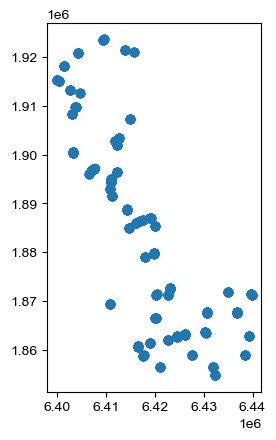

In [37]:
gdf.plot()

In [19]:
import cartopy.crs as ccrs

<>:8: DeprecationWarning: invalid escape sequence \d
<>:8: DeprecationWarning: invalid escape sequence \d
C:\Users\arich\AppData\Local\Temp\1\ipykernel_36536\669442494.py:8: DeprecationWarning: invalid escape sequence \d
  plt.savefig('..\discharge\seepage_points.png')


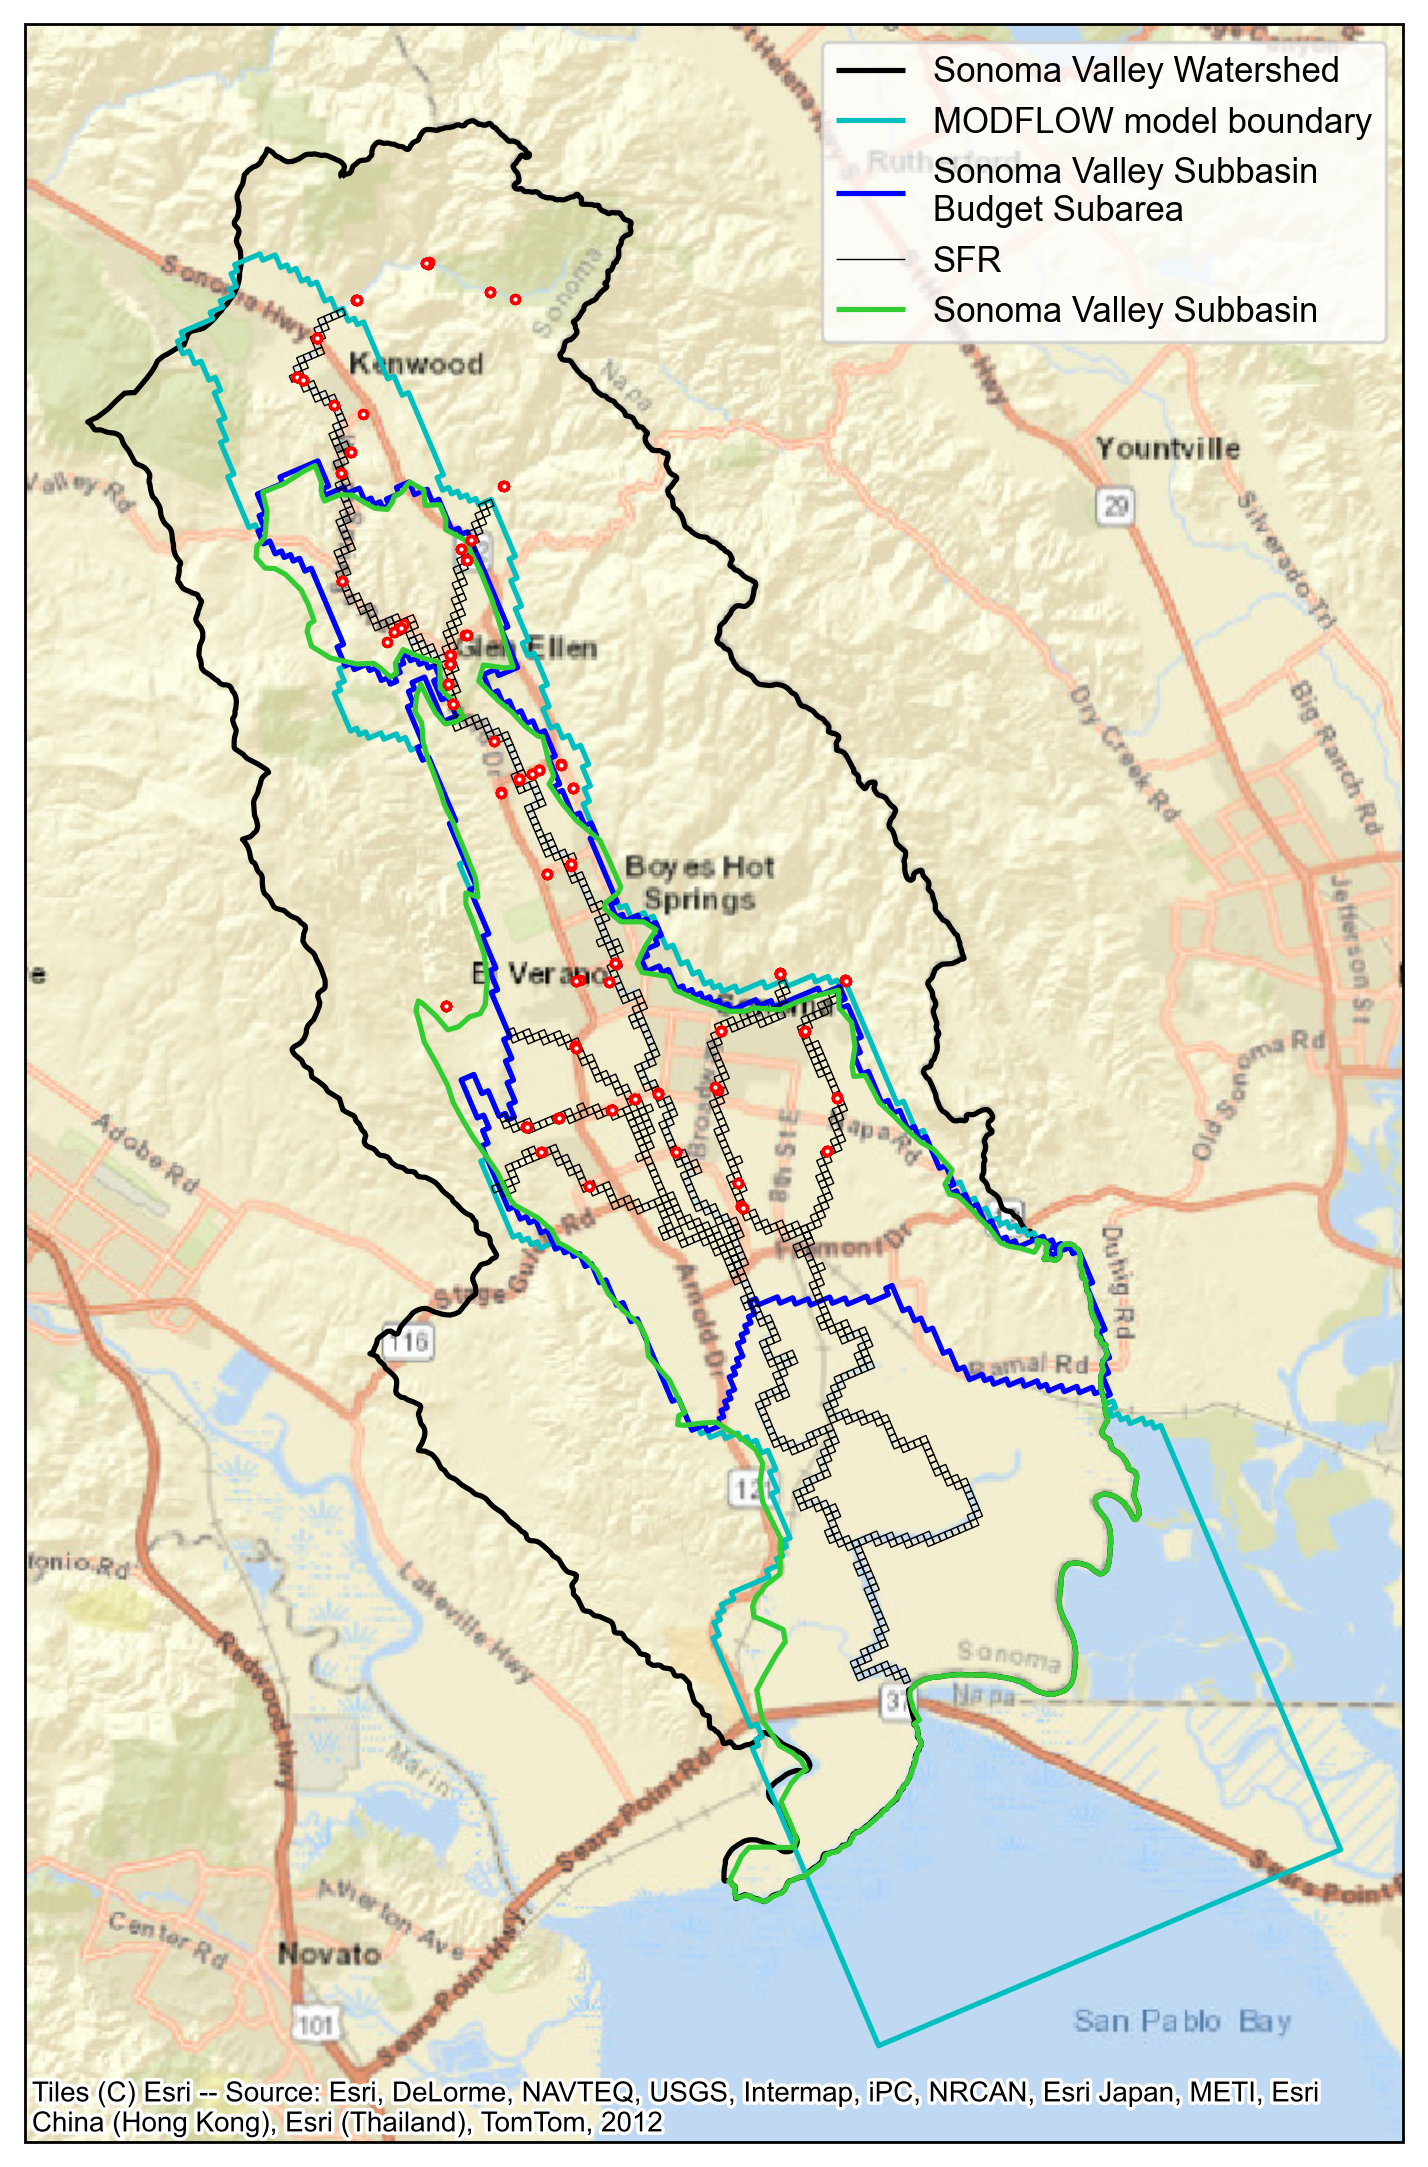

In [30]:
fig = plt.figure(figsize = (8.5,11), dpi = 250)
ax = plt.subplot( projection=ccrs.epsg(2226))

ax = conda_scripts.sv_budget.sv_budget.sv_mod_map(ax = ax)
ou.plot(ax = ax, markersize = 5,zorder = 100, fc  = 'w', ec = 'r')

# conda_scripts.plot_help.label_points(ax, ou, 'source', already_str=False,text_color='b')
plt.savefig('..\discharge\seepage_points.png')